In [1]:
# WAP to implement SVM for classificationn and regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
new=pd.read_csv('abalone.csv')

In [4]:
new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
new.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
new.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
new.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


[]

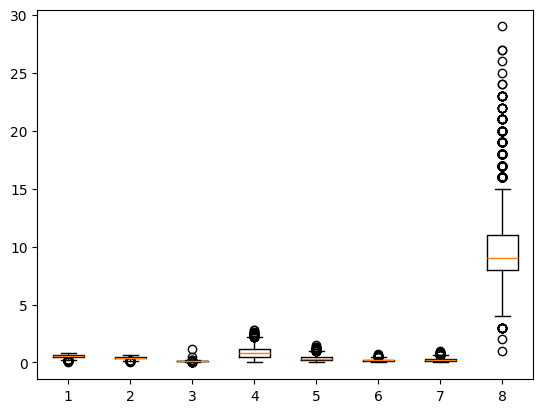

In [9]:
plt.boxplot(new[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']])
plt.plot()

In [10]:
df1 = new.drop('Sex',axis = 1)

In [11]:
df1.clip(df1.quantile(0.2),df1.quantile(0.9),axis=1,inplace=True)

[]

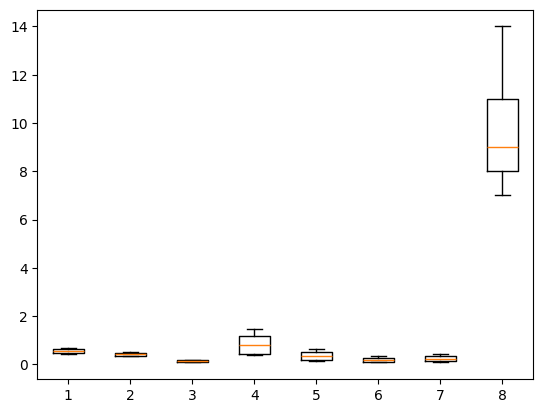

In [12]:
plt.boxplot(df1[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']])
plt.plot()

In [13]:
x=new.drop('Rings',axis=1)

In [14]:
y=new['Rings']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
l=LabelEncoder()

<Axes: xlabel='Sex', ylabel='count'>

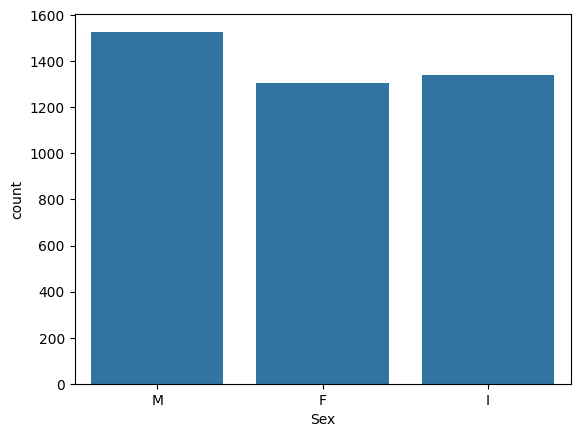

In [17]:
sns.countplot(data=new,x='Sex')

In [18]:
new['Sex']=l.fit_transform(new['Sex'])
new['Sex'].value_counts()

Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64

In [19]:
x=x.drop('Sex',axis=1)

In [20]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [21]:
new.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

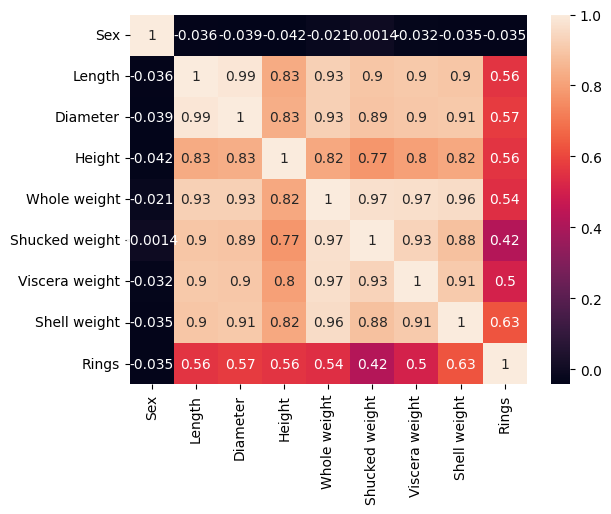

In [22]:
sns.heatmap(new.corr(),annot=True)

In [23]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest

In [24]:
i = mutual_info_regression(x,y)

In [25]:
i1 = pd.Series(i,x.columns[0:len(x)])

<Axes: >

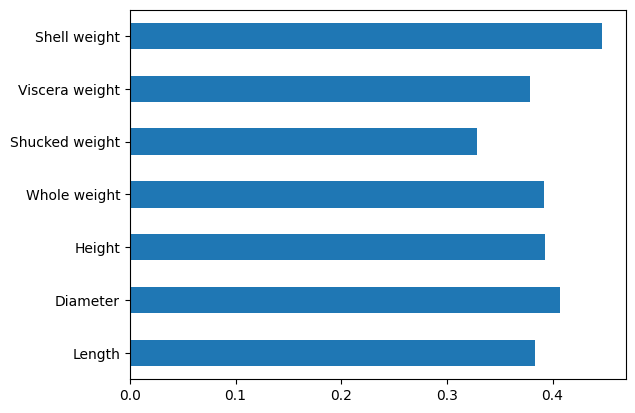

In [26]:
i1.plot(kind = 'barh')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [29]:
from sklearn.svm import SVR

In [30]:
reg=SVR()

In [31]:
from sklearn.model_selection import  GridSearchCV

In [32]:
param={'C':[0.1,10,100,0.01],'gamma':['scale','auto'],'kernel':['poly','rbf','linear']}

In [33]:
g=GridSearchCV(reg,param,cv=2)

In [34]:
g.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 10, 100, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear']})

In [35]:
g.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [36]:
y_pred=g.predict(x_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
print(r2_score(y_test,y_pred))

0.5103123265270597


In [39]:
# svm on classification

In [40]:
from sklearn.datasets import load_iris

In [41]:
iris = load_iris()

In [42]:
df = pd.DataFrame(data = iris.data,columns= iris.feature_names)

In [43]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [45]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [46]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [48]:
df.shape

(150, 4)

In [49]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [50]:
df.duplicated().sum()


1

In [51]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


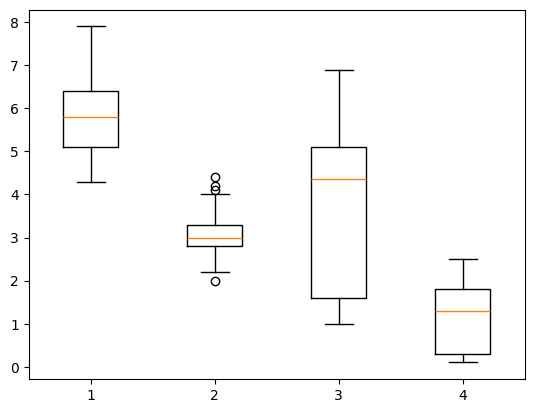

In [52]:
plt.boxplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']])
plt.show()

In [53]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [54]:
df.clip(df.quantile(0.2),df.quantile(0.9),axis=1,inplace = True)


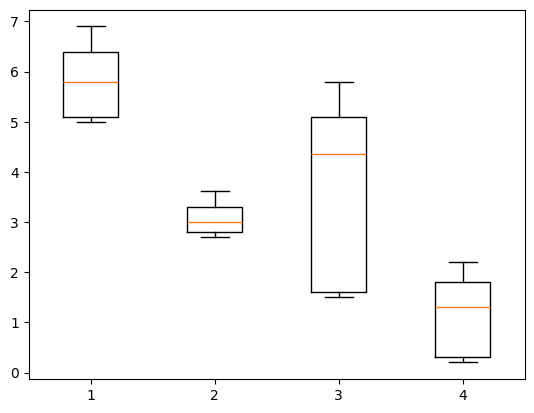

In [55]:
plt.boxplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']])
plt.show()


In [56]:
from sklearn.feature_selection import mutual_info_classif

In [57]:
df1 = iris.target

In [58]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.5,0.2
1,5.0,3.0,1.5,0.2
2,5.0,3.2,1.5,0.2
3,5.0,3.1,1.5,0.2
4,5.0,3.6,1.5,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.2
146,6.3,2.7,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.2


In [59]:
df1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
l = mutual_info_classif(df,df1)

In [61]:
l1 = pd.Series(l,df.columns[0:len(df)])

<Axes: >

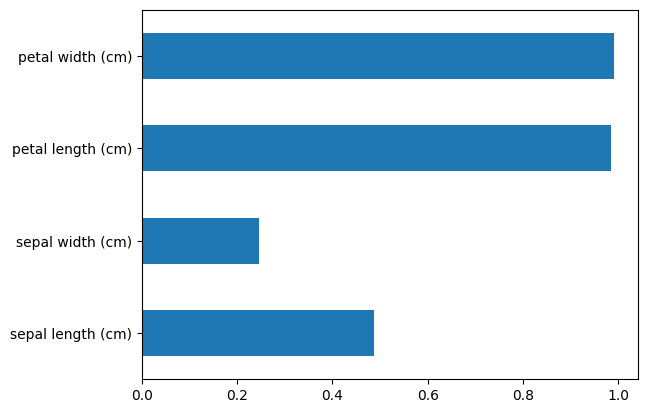

In [62]:
l1.plot(kind = 'barh')


In [63]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.228087,0.869055,0.839418
sepal width (cm),-0.228087,1.000000,-0.502277,-0.438484
petal length (cm),0.869055,-0.502277,1.000000,0.973578
petal width (cm),0.839418,-0.438484,0.973578,1.000000


<Axes: >

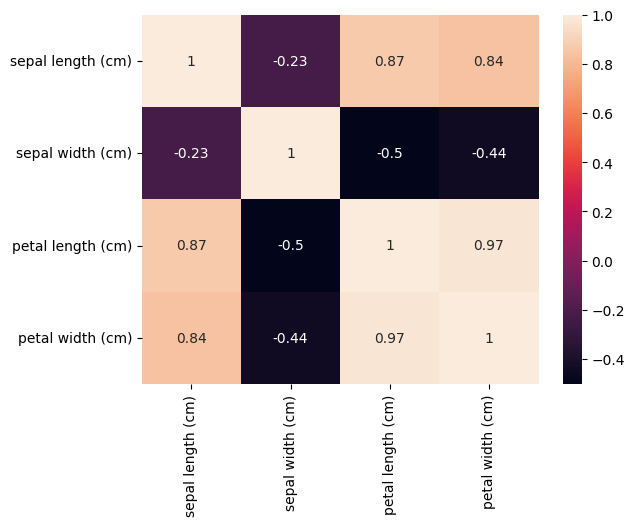

In [64]:
sns.heatmap(df.corr(),annot = True)

<Axes: ylabel='Count'>

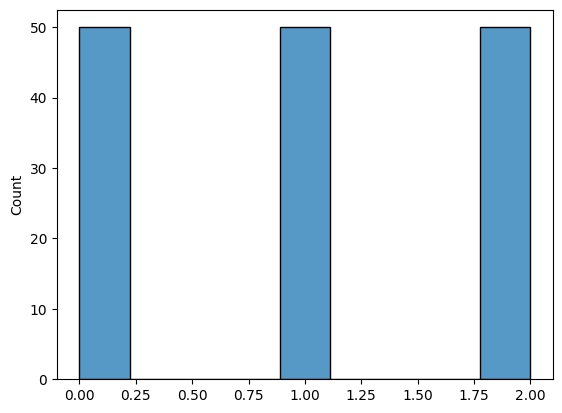

In [65]:
sns.histplot(data = df1)


<Axes: ylabel='count'>

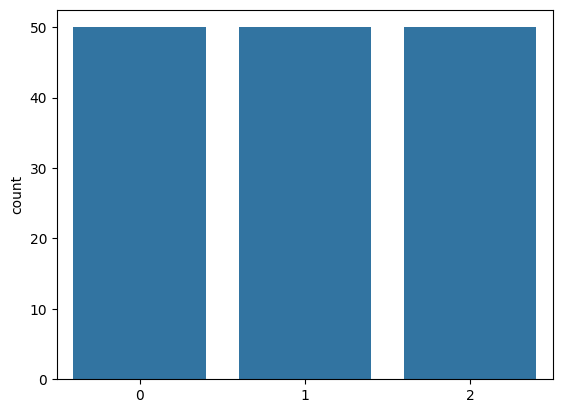

In [66]:
sns.countplot(data=df,x=df1)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(df,df1,test_size=0.3)

In [69]:
from sklearn.svm import SVC

In [70]:
cls = SVC()

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param={'C':[0.1,10,100,0.01],'gamma':['scale','auto'],'kernel':['poly','rbf','linear']}

In [73]:
g=GridSearchCV(cls,param,cv=2)

In [74]:
g.fit(x_train,y_train)


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear']})

In [75]:
g.best_params_


{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}

In [76]:
y_pred=g.predict(x_test)

In [77]:
from sklearn.metrics import r2_score

In [78]:

print(r2_score(y_test,y_pred))

0.9305555555555556
